In [2]:
import numpy as np

import pandas as pd

import os

import glob

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

from tensorflow.keras import Sequential, models

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
path = '/home/mk/dev_ws/data/Face Mask Dataset/'

dataset = {
'image_path': [],
'mask_status': [],
'where': []
}

for where in os.listdir(path):
  for status in os.listdir(path+"/"+where):
    for image in glob.glob(path+where+"/"+status+"/"+"*.png"):

      dataset ["image_path"].append(image)
      dataset ["mask_status"].append(status)
      dataset["where"].append(where)

dataset = pd.DataFrame(dataset)
dataset .head()

,image_path,mask_status,where
0,/home/mk/dev_ws/data/Face Mask Dataset/Validat...,WithoutMask,Validation
1,/home/mk/dev_ws/data/Face Mask Dataset/Validat...,WithoutMask,Validation
2,/home/mk/dev_ws/data/Face Mask Dataset/Validat...,WithoutMask,Validation
3,/home/mk/dev_ws/data/Face Mask Dataset/Validat...,WithoutMask,Validation
4,/home/mk/dev_ws/data/Face Mask Dataset/Validat...,WithoutMask,Validation


With Mask: 5909
Without Mask: 5883


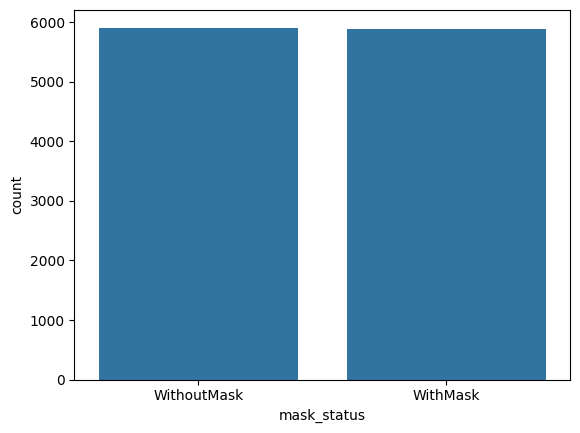

In [5]:
print(f"With Mask:", dataset.value_counts("mask_status")[0])
print(f"Without Mask:", dataset.value_counts("mask_status")[1])

sns.countplot(x = dataset["mask_status"]);

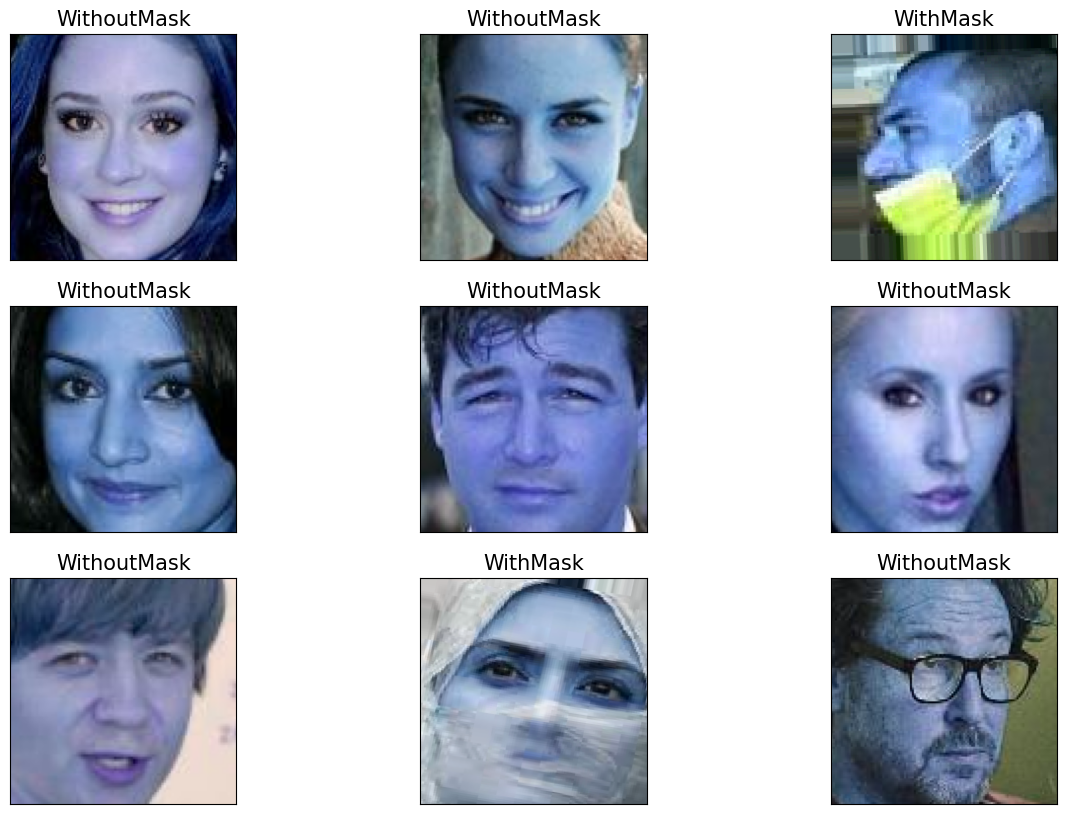

In [7]:
import cv2
plt.figure(figsize = (15, 10))

for i in range(9):
  random = np.random.randint(1, len(dataset) )
  plt.subplot(3, 3, i+1)
  plt.imshow(cv2.imread(dataset.loc[random, "image_path"]))
  plt.title(dataset.loc[random,"mask_status"], size = 15)
  plt.xticks([])
  plt.yticks([])

plt.show()

In [9]:
train_df = dataset[dataset["where"] == "Train"]
test_df = dataset[dataset["where"] == "Test"]
valid_df = dataset[dataset["where"] == "Validation"]

print(train_df.head(10))

                                             image_path  mask_status  where
1792  /home/mk/dev_ws/data/Face Mask Dataset/Train/W...  WithoutMask  Train
1793  /home/mk/dev_ws/data/Face Mask Dataset/Train/W...  WithoutMask  Train
1794  /home/mk/dev_ws/data/Face Mask Dataset/Train/W...  WithoutMask  Train
1795  /home/mk/dev_ws/data/Face Mask Dataset/Train/W...  WithoutMask  Train
1796  /home/mk/dev_ws/data/Face Mask Dataset/Train/W...  WithoutMask  Train
1797  /home/mk/dev_ws/data/Face Mask Dataset/Train/W...  WithoutMask  Train
1798  /home/mk/dev_ws/data/Face Mask Dataset/Train/W...  WithoutMask  Train
1799  /home/mk/dev_ws/data/Face Mask Dataset/Train/W...  WithoutMask  Train
1800  /home/mk/dev_ws/data/Face Mask Dataset/Train/W...  WithoutMask  Train
1801  /home/mk/dev_ws/data/Face Mask Dataset/Train/W...  WithoutMask  Train


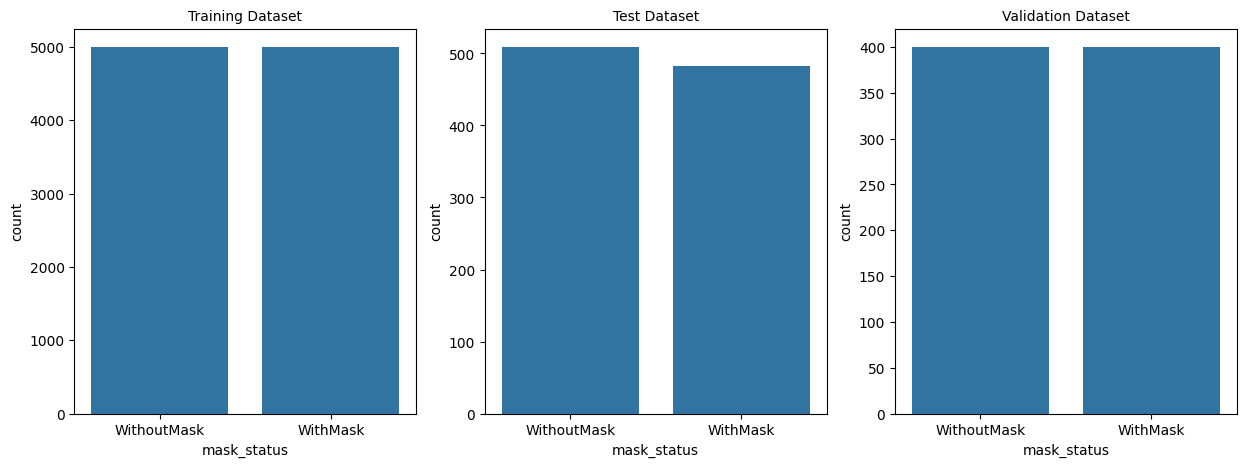

In [10]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)

sns.countplot(x = train_df["mask_status"])
plt.title("Training Dataset", size = 10)

plt.subplot(1, 3, 2)
sns.countplot(x = test_df["mask_status"])
plt.title("Test Dataset", size = 10)

plt.subplot(1, 3, 3)
sns.countplot(x = valid_df["mask_status"])

plt.title("Validation Dataset", size = 10)

plt.show()


In [11]:
train_df = train_df.reset_index().drop("index", axis = 1)
train_df.head()

,image_path,mask_status,where
0,/home/mk/dev_ws/data/Face Mask Dataset/Train/W...,WithoutMask,Train
1,/home/mk/dev_ws/data/Face Mask Dataset/Train/W...,WithoutMask,Train
2,/home/mk/dev_ws/data/Face Mask Dataset/Train/W...,WithoutMask,Train
3,/home/mk/dev_ws/data/Face Mask Dataset/Train/W...,WithoutMask,Train
4,/home/mk/dev_ws/data/Face Mask Dataset/Train/W...,WithoutMask,Train


In [19]:
data = []
image_size = 150

for i in range(len(train_df)):
  ## Converting the image into grayscale
  img_array = cv2.imread(train_df["image_path"][i], cv2.IMREAD_GRAYSCALE)

  ## Resizing the array
  new_image_array = cv2.resize(img_array, (image_size, image_size))

##Encoding the image with the label

  if train_df["mask_status"][i] == "WithMask":
    data.append([new_image_array, 1])

  else:
    data.append([new_image_array, 0])

In [21]:
np.random.shuffle(data)

In [20]:
data = np.array(data)

/tmp/ipykernel_21205/4012140830.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


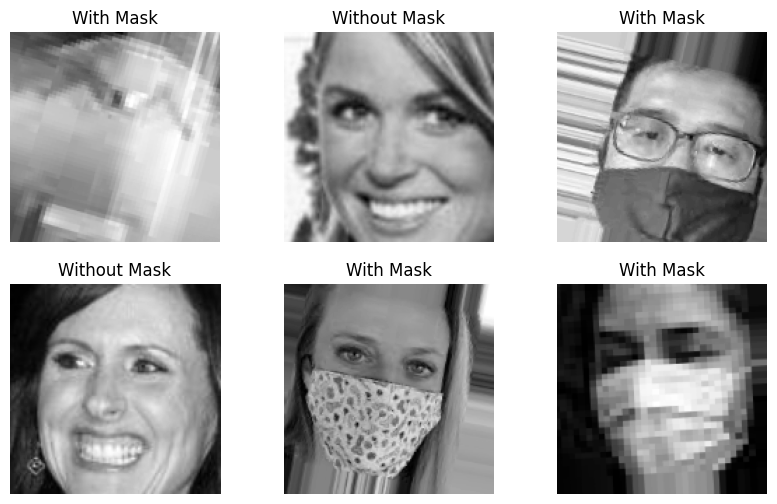

In [22]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6))

for row in range(2):
  for col in range(3):
    image_index = row*100+col

    ax[row, col].axis("off")
    ax[row,col].imshow(data[image_index][0], cmap = "gray")

    if data[image_index][1] == 0:
      ax[row, col].set_title("Without Mask")
    else:

      ax[row, col].set_title("With Mask")

plt.show()

In [23]:
X = []
y = []

for image in data:
  X.append(image[0])
  y.append(image[1])

X = np.array(X)
y = np.array(y)

In [24]:


X_train, X_val, y_train, y_val = train_test_split(X, y,
test_size = 0.2,
random_state = 13)

In [25]:
from tensorflow.keras import layers, models

model = models.Sequential([

layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=(150,150,1)),

layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

layers.Conv2D(64, (2,2), activation='relu', padding='same'),

layers.MaxPooling2D(pool_size=(2,2)),

layers.Dropout(0.25),

layers.Flatten(),

layers.Dense(1000, activation='relu'),

layers.Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 37, 37, 64)        0         
                                                                 
 flatten (Flatten)           (None, 87616)             0

2024-05-12 18:51:23.660849: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-12 18:51:23.678100: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-12 18:51:23.678269: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [26]:
model.compile(optimizer='adam',
loss=tf.keras.losses.BinaryCrossentropy(),
metrics=['accuracy'])

In [27]:
X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(len(X_val), X_val.shape[1], X_val.shape[2], 1)

history = model.fit(X_train, y_train, epochs=5, batch_size = 32)


2024-05-12 18:52:24.314763: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 180000000 exceeds 10% of free system memory.
2024-05-12 18:52:24.412525: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 180000000 exceeds 10% of free system memory.


Epoch 1/5


2024-05-12 18:52:25.035960: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-05-12 18:52:25.108100: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-05-12 18:52:25.365899: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-05-12 18:52:25.571721: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7ff421f7a980 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-12 18:52:25.571787: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-05-12 18:52:25.575006: I tensorflow/compiler/mlir/tensorflow/utils

250/250 [==============================] - 13s 41ms/step - loss: 41.9315 - accuracy: 0.8906
Epoch 2/5
250/250 [==============================] - 10s 41ms/step - loss: 0.0755 - accuracy: 0.9718
Epoch 3/5
250/250 [==============================] - 10s 41ms/step - loss: 0.0774 - accuracy: 0.9700
Epoch 4/5
250/250 [==============================] - 10s 41ms/step - loss: 0.0689 - accuracy: 0.9759
Epoch 5/5
250/250 [==============================] - 10s 41ms/step - loss: 0.0384 - accuracy: 0.9843


In [28]:
model.evaluate(X_val, y_val)

63/63 [==============================] - 1s 11ms/step - loss: 0.1223 - accuracy: 0.9695


[0.12225478142499924, 0.9695000052452087]

In [31]:
prediction = (model.predict(X_val) > 0.5).astype("int32")
print (classification_report(y_val, prediction) )
print(confusion_matrix(y_val, prediction))

63/63 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       997
           1       0.97      0.97      0.97      1003

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

[[964  33]
 [ 28 975]]


In [34]:
from numba import cuda

device = cuda.get_current_device(); device.reset()

In [2]:
model2 = models.Sequential([

  layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=(150,150,1)),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  layers.Conv2D(64, (2,2), activation='relu', padding='same'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(1000, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])
model2.summary()


NameError: name 'models' is not defined

In [ ]:
model2.compile(optimizer='adam',
loss=tf.keras.losses.BinaryCrossentropy(),
metrics=['accuracy'])

In [ ]:
X = []
y = []

for image in data:
  X.append(image[0])
  y.append(image[1])

X = np.array(X)
y = np.array(y)

X = X/255


X_train, X_val, y_train, y_val = train_test_split(X, y,
test_size = 0.2,
random_state = 13)

In [ ]:
X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(len(X_val), X_val.shape[1], X_val.shape[2], 1)

history = model2.fit(X_train, y_train, epochs=5, batch_size = 32)


In [ ]:
model2.evaluate(X_val, y_val)

In [ ]:
prediction = model2.predict_classes(X_val)

print(classification_report(y_val, prediction))
print(confusion_matrix(y_val, prediction))

In [ ]:
wrong_result = []
for n in range(0, len(y_val)):
  if prediction[n] != y_val[n]:

    wrong_result.append(n)

len(wrong_result)

In [ ]:
import random
samples = random.choices(population=wrong_result, k=6)
plt.figure(figsize=(14,12))
for idx, n in enumerate(samples):
  plt.subplot(3, 2, idx+1)
  plt.imshow(X_val[n].reshape(150,150), interpolation='nearest' )
  plt.title(prediction[n])

  plt.axis('off')

plt.show()